# Ⅰ. 시계열 
## - powerbi에서 나온 데이터를 통해 시각화 함

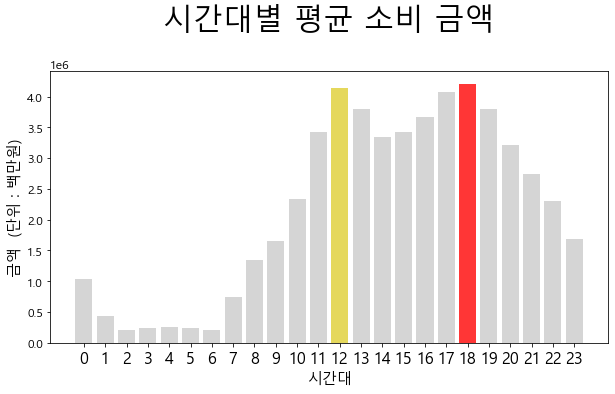

In [1]:
# 결말_1(시간별)

import matplotlib.pyplot as plt


plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 12 # 글자 크기

levels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']
counts = [1044020.73,429403.69,202640.86,236639.19,259184.16,236956.02,202850.96,750887.41,1337976.9,1655340.3,2331586.82,3418122.94,4145874.51,3795371.56,3350026.81,3419566.38,3666625.58,4070689.91,4204817.21,3799254.05,3211333.5,2740179.5,2300728.41,1693664.45]
color = ['#D5D5D5', '#D5D5D5', '#D5D5D5', '#D5D5D5', '#D5D5D5','#D5D5D5', '#D5D5D5', '#D5D5D5','#D5D5D5', '#D5D5D5', '#D5D5D5','#D5D5D5','#E5D85C','#D5D5D5','#D5D5D5','#D5D5D5','#D5D5D5','#D5D5D5','#FF3636','#D5D5D5','#D5D5D5','#D5D5D5','#D5D5D5','#D5D5D5',]
plt.figure(figsize=(10,5))

plt.bar(levels, counts, color=color)
plt.xticks(size=16)
plt.xlabel("시간대", size = 15)
plt.ylabel('금액  (단위 : 백만원)', size = 15)
plt.title('시간대별 평균 소비 금액\n', size = 30)
plt.show()

# Ⅱ. 유지 이탈 고객 분류
## 가. 유지 고객

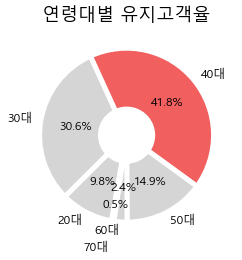

In [2]:
import matplotlib.pyplot as plt
import pymysql
import pandas as pd
con = pymysql.connect(host = '127.0.0.1', user = 'root', password = 'lpoint',
                       db = 'lpoint', charset = 'utf8')
cur = con.cursor(pymysql.cursors.DictCursor)
cur.execute(
    "select c.ages,count(distinct(a.cust)) from 엘페이이용 a join 엘페이이용정보 b on a.cust = b.cust join 고객정보 c on b.cust = c.cust where max_days <= 45 group by c.ages;")
result=cur.fetchall()
con.commit()
con.close()

df = pd.DataFrame(result)

df.columns = ['age', 'cust']
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 12 # 글자 크기
ratio = df['cust']
labels = df['age']
colors = ['#D5D5D5', '#D5D5D5','#F15F5F', '#D5D5D5', '#D5D5D5', '#D5D5D5']
explode = [0, 0, 0, 0, 0, 0.2]
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops, explode=explode)
plt.title('연령대별 유지고객율', size = 18)
plt.show()

## 나. 이탈 고객

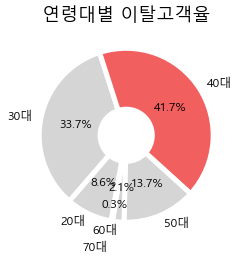

In [3]:
import matplotlib.pyplot as plt
import pymysql
import pandas as pd
con = pymysql.connect(host = '127.0.0.1', user = 'root', password = 'lpoint',
                       db = 'lpoint', charset = 'utf8')
cur = con.cursor(pymysql.cursors.DictCursor)
cur.execute(
    "select c.ages,count(distinct(a.cust)) from 엘페이이용 a join 엘페이이용정보 b on a.cust = b.cust join 고객정보 c on b.cust = c.cust where max_days > 45 group by c.ages;")
result=cur.fetchall()
con.commit()
con.close()

df = pd.DataFrame(result)

df.columns = ['age', 'cust']
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 12 # 글자 크기
ratio = df['cust']
labels = df['age']
colors = ['#D5D5D5', '#D5D5D5','#F15F5F', '#D5D5D5', '#D5D5D5', '#D5D5D5']
explode = [0, 0, 0, 0, 0, 0.2]
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops, explode=explode)
plt.title('연령대별 이탈고객율', size = 18)
plt.show()